In [422]:
import torch 
import torch.nn as nn
import numpy as np
from tqdm import trange
from sklearn.preprocessing import StandardScaler
import sklearn.datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [423]:
bc = sklearn.datasets.load_breast_cancer()
X, y = bc.data, bc.target
X.shape, y.shape

((569, 30), (569,))

In [424]:
ddd = pd.DataFrame(X, columns=bc.feature_names)
ddd["labels"] = y
ddd = ddd.sample(frac=1).reset_index(drop=True)
ddd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,35.74,88.84,595.7,0.12270,0.1620,0.2439,0.06493,0.2372,0.07242,1
1,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558,0
2,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,36.71,149.30,1269.0,0.16410,0.6110,0.6335,0.20240,0.4027,0.09876,0
3,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,25.02,75.79,439.6,0.13330,0.1049,0.1144,0.05052,0.2454,0.08136,1
4,13.860,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,0.2106,0.06916,...,26.93,104.40,750.1,0.14600,0.4370,0.4636,0.16540,0.3630,0.10590,0


In [425]:
y = ddd["labels"].to_numpy()
ddd = ddd.drop(columns=["labels"])
X = ddd.to_numpy()

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(-1, 1)

In [427]:
class DavNet(nn.Module):
    
    def __init__(self, n_features, output_size):
        super(DavNet, self).__init__()
        self.linear = nn.Linear(n_features, output_size)
        
    def forward(self, x):
        prediction = torch.sigmoid(self.linear(x))
        return prediction
    
learning_rate = 0.01
n_features = X_train.shape[1]
output_size = 1
    
model = DavNet(n_features, output_size)
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

lolololoss: 0.02990: 100%|███████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1146.85it/s]


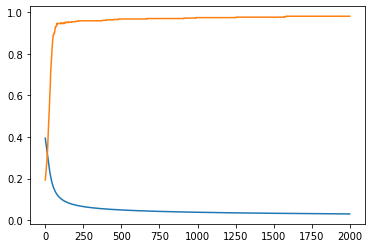

In [428]:
n_epochs = 2000

losses = []
accuracies = []
for epoch in (t := trange(n_epochs)):
    
    optimizer.zero_grad()   
    predictions = model(X_train)   
    accuracies.append((predictions.round()==y_train).numpy().mean())  
    loss = loss_function(predictions, y_train) 
    loss.backward()  
    optimizer.step()
    
    losses.append(loss.item())
    t.set_description("lolololoss: %.5f" % loss.item())
    
plt.plot(losses)
plt.plot(accuracies)

In [429]:
test_predictions = model(X_test).detach().numpy().round()
y_test_stuff = y_test.numpy().reshape(-1, 1)
comparison = test_predictions == y_test_stuff
"accuracy percentage on test data:", comparison.sum()/len(comparison)

('accuracy percentage on test data:', 0.9649122807017544)